DATA PREPROCESSING

In [10]:
#Importing the necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import imutils

In [44]:
def displayImg(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    plt.show()

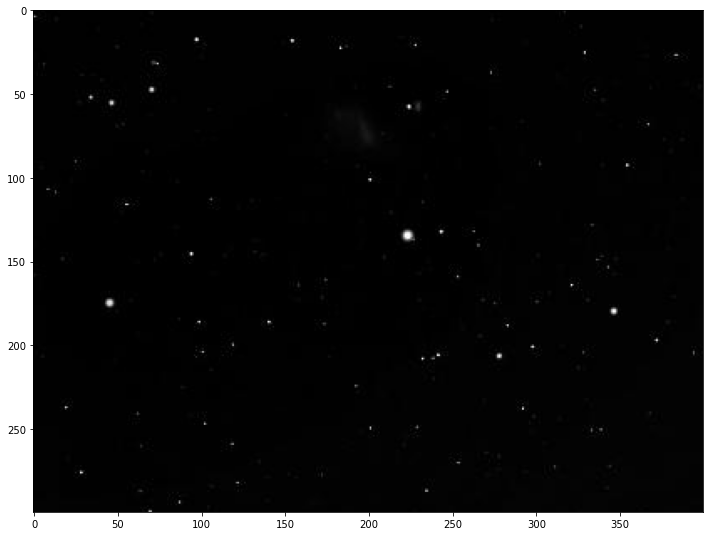

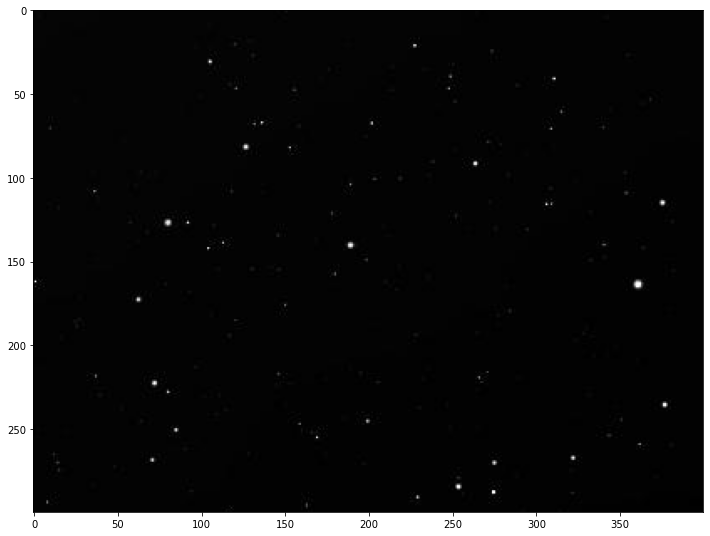

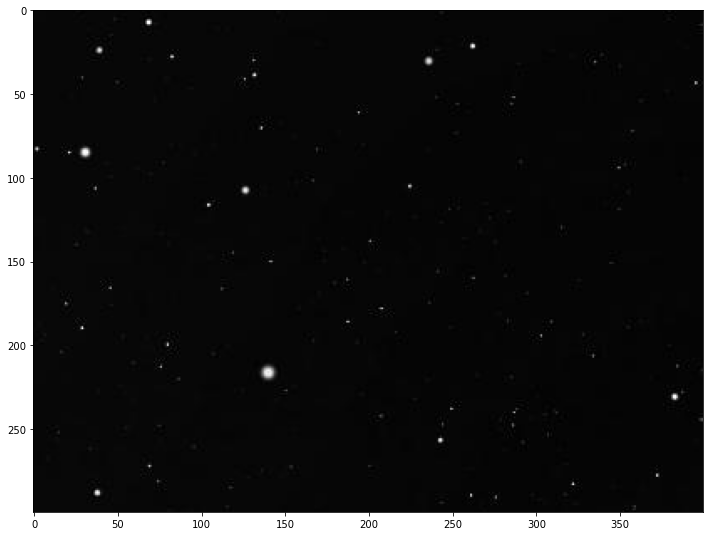

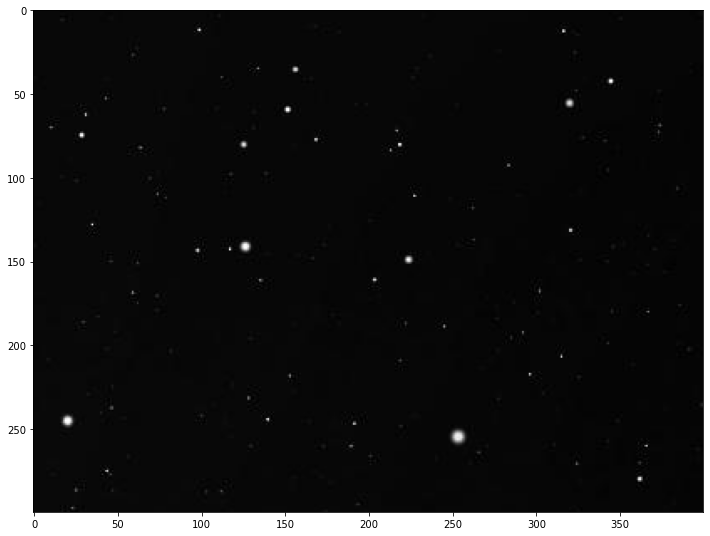

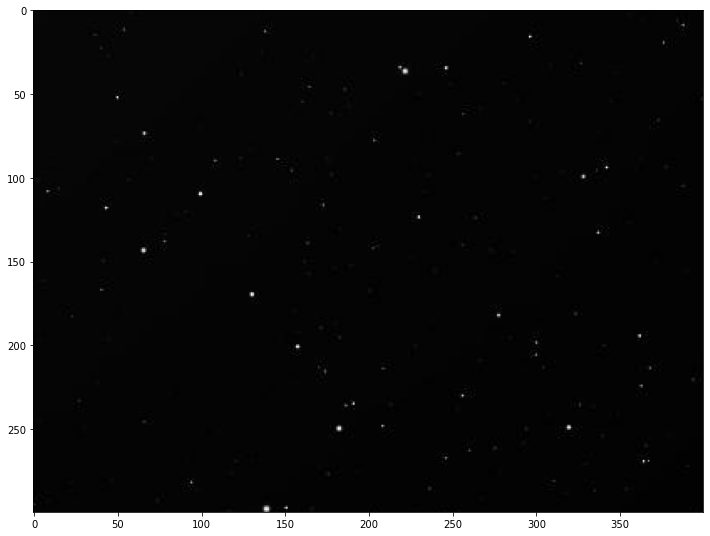

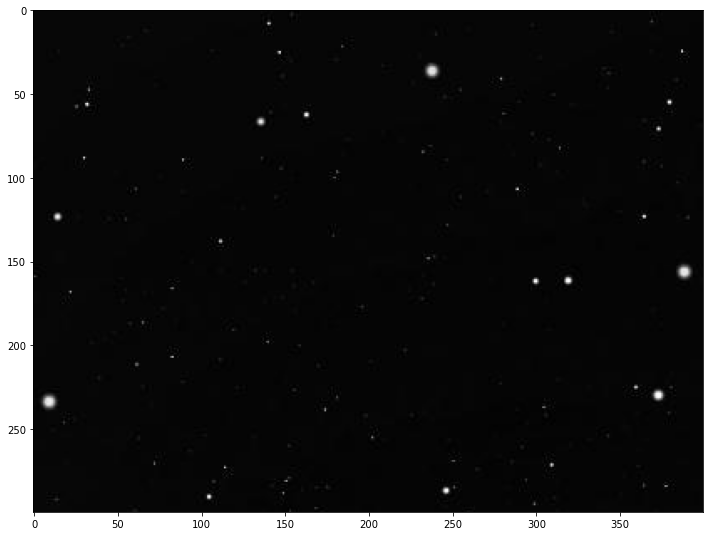

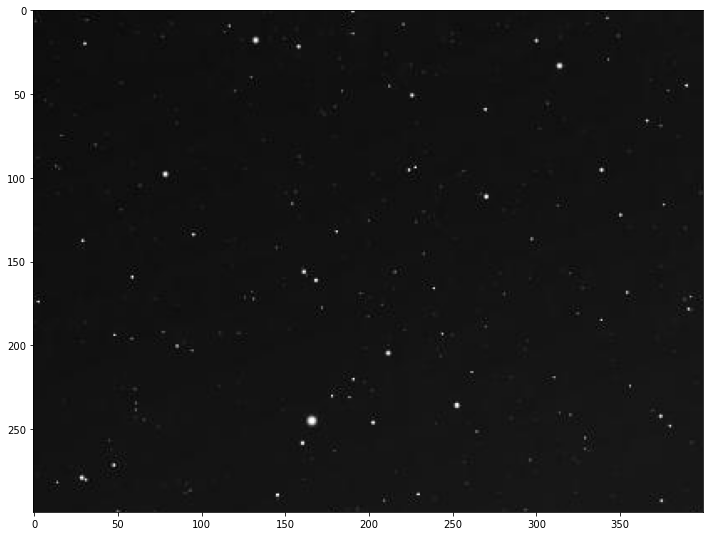

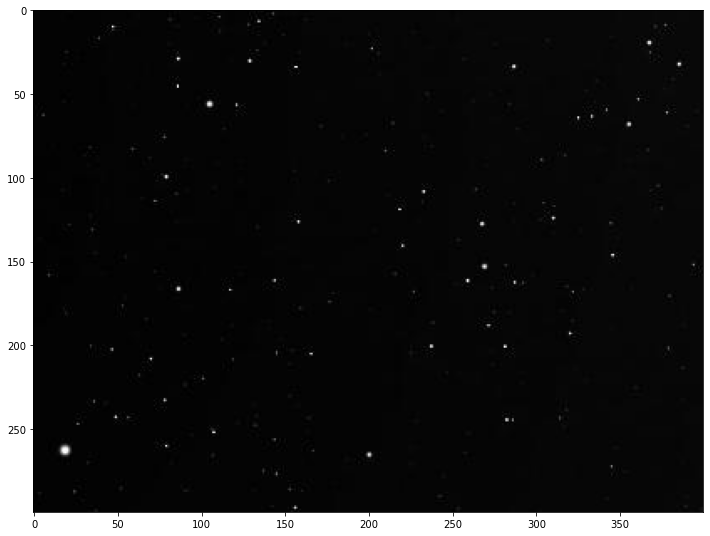

In [34]:
#Putting the image into a list
images = []
for index in range(8):
    path = 'C:/PythonPrograms/GitClones/CodingProgressforThesis/Star Tracker/dataset/'+str(index)+'/'
    img = cv2.imread(path+'0.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    images.append(img)
    displayImg(img)

In [24]:
images = np.array(images)
print(images.shape)

(8, 300, 400)


In [69]:
#Rotation variance
for index,image in enumerate(images):
    count=0
    path = 'C:/PythonPrograms/GitClones/CodingProgressforThesis/Star Tracker/dataset/'+str(index)+'/'
    for angle in np.arange(0,360,3):
        count+=1
        rotated = imutils.rotate_bound(image,angle)
        cv2.imwrite(path+str(count)+'.jpg',rotated)


In [84]:
#Noise variance
path = 'C:/PythonPrograms/GitClones/CodingProgressforThesis/Star Tracker/dataset/'
for folder in os.listdir(path):
    count=120
    for filename in os.listdir(path+folder+'/'):
        img = cv2.imread(path+folder+'/'+filename)
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        row,col = img_gray.shape
        for max_noise_step in range(1,4):
            max_noise = 50*max_noise_step
            noise = np.random.randint(0,max_noise,size=(row,col)).astype('uint8')
            for addweighted_step in range(0,5):
                count+=1
                minus_weighted = addweighted_step*0.1
                dst = cv2.addWeighted(img_gray,0.9-minus_weighted,noise,0.1+minus_weighted,0)
                cv2.imwrite(path+folder+'/'+str(count)+'.jpg',dst)